## **Face detection with the dlib library using both HOG + Linear SVM and CNNs**

Dlib provides two methods to perform face detection:

1. A **HOG + Linear SVM face detector** that is accurate and computationally efficient. `dlib.get_frontal_face_detector()`
2. A **Max-Margin (MMOD) CNN face detector** that is both highly accurate and very robust, capable of detecting faces from varying viewing angles, lighting conditions, and occlusion. `dlib.cnn_face_detection_model_v1(modelPath)`

> The **HOG** + **Linear SVM face detector** will be faster than the **MMOD CNN face detector** but will also be less accurate as HOG + Linear SVM does not tolerate changes in the viewing angle rotation.

For more robust face detection, use dlib’s MMOD CNN face detector. This model requires significantly more computation (and is thus slower) but is much more accurate and robust to changes in face rotation and viewing angle.

In [1]:
%cd dlib-face-detection

/content/dlib-face-detection


### Import Packages

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import imutils
import time
import dlib
import cv2

Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Creating our bounding box converting and clipping function

In [4]:
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()

	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])

	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY

	# return our bounding box coordinates
	return (startX, startY, w, h)

### Implementing HOG + Linear SVM face detection with dlib

In [5]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, required=True,
#	help="path to input image")
#ap.add_argument("-u", "--upsample", type=int, default=1,
#	help="# of times to upsample")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/outing.jpg",
    "upsample": 1
}

In [6]:
# load dlib's HOG + Linear SVM face detector
print("[INFO] loading HOG + Linear SVM face detector...")
detector = dlib.get_frontal_face_detector()

# load the input image from disk, resize it, and convert it from
# BGR to RGB channel ordering (which is what dlib expects)
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# perform face detection using dlib's face detector
start = time.time()
print("[INFO[ performing face detection with dlib...")
rects = detector(rgb, args["upsample"])
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

[INFO] loading HOG + Linear SVM face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 0.3938 seconds


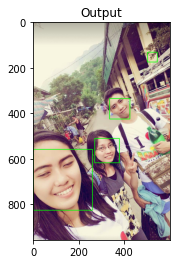

In [7]:

# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r) for r in rects]

# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Output", image)

### Implementing CNN face detection with dlib

In [8]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, required=True,
#	help="path to input image")
#ap.add_argument("-m", "--model", type=str,
#	default="mmod_human_face_detector.dat",
#	help="path to dlib's CNN face detector model")
#ap.add_argument("-u", "--upsample", type=int, default=1,
#	help="# of times to upsample")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/cousin_vacation.jpg",
    "model": "mmod_human_face_detector.dat",
    "upsample": 1
}

In [9]:
# load dlib's CNN face detector
print("[INFO] loading CNN face detector...")
detector = dlib.cnn_face_detection_model_v1(args["model"])

# load the input image from disk, resize it, and convert it from
# BGR to RGB channel ordering (which is what dlib expects)
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# perform face detection using dlib's face detector
start = time.time()
print("[INFO[ performing face detection with dlib...")
results = detector(rgb, args["upsample"])
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

[INFO] loading CNN face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 1.1527 seconds


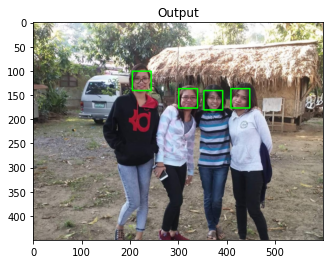

In [10]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r.rect) for r in results]

# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Output", image)